<a href="https://colab.research.google.com/github/achore26/Data-Tracker-covid19/blob/main/Data_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load directly from Our World in Data
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Preview data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
# Check column names
df.columns

# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes


,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
...,...
population,int64
excess_mortality_cumulative_absolute,float64
excess_mortality_cumulative,float64
excess_mortality,float64


In [3]:
# Remove aggregates like "World", "Africa", etc.
df = df[~df['iso_code'].str.startswith('OWID')]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill missing numeric values with 0 in critical columns
cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[cols] = df[cols].fillna(0)

# Filter for a few countries for analysis
countries = ['Kenya', 'India', 'United States']
df_countries = df[df['location'].isin(countries)]



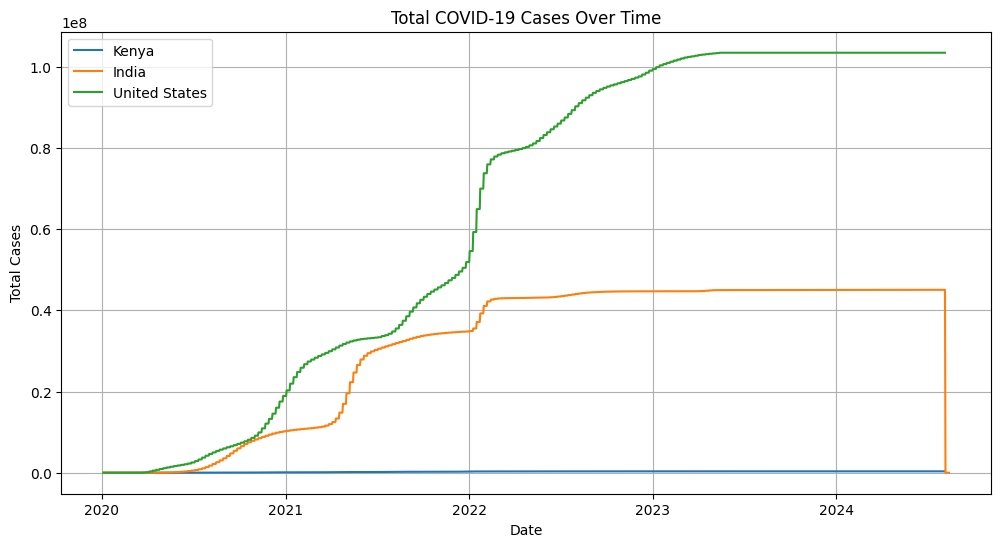

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()


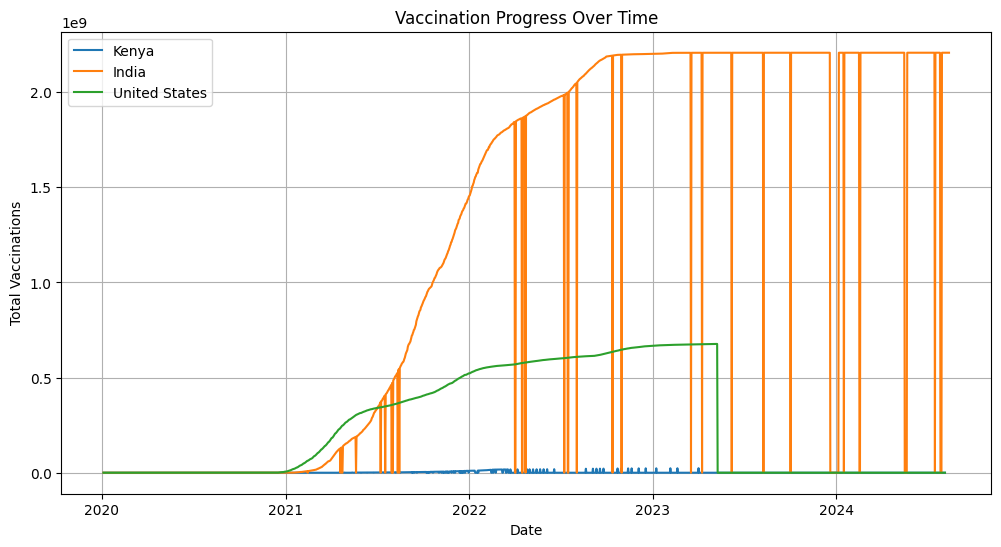

In [5]:
plt.figure(figsize=(12, 6))

for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import plotly.express as px

latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Plasma",
                    title="Total COVID-19 Cases by Country")
fig.show()
